## ANNs with keras
### Dropout regularization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
dataset = df.values
X = dataset[:,0:10]
y = dataset[:,10]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

# Model#1

In [4]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy'])

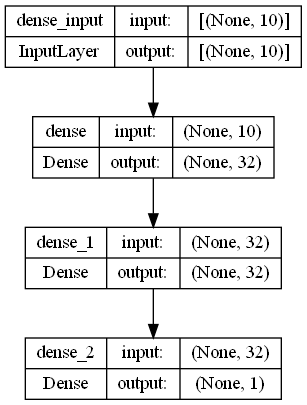

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Split data
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [8]:
# Train
hist = model.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.6799 - accuracy: 0.4971 - val_loss: 0.6765 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.4971 - val_loss: 0.6720 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.4980 - val_loss: 0.6677 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.5010 - val_loss: 0.6632 - val_accuracy: 0.5160
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.5039 - val_loss: 0.6582 - val_accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.5294 - val_loss: 0.6524 - val_accuracy: 0.5571
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6057 - val_loss: 0.6461 - val_accuracy: 0.6849
Epoch 8/100
3

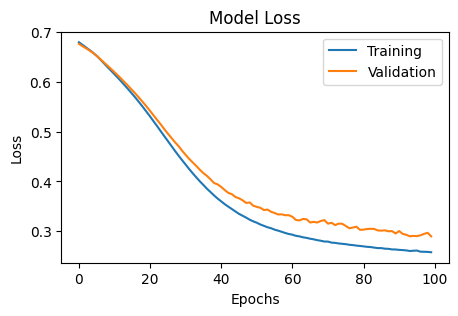

In [9]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

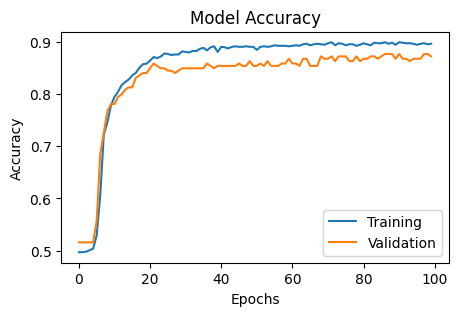

In [10]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model#2

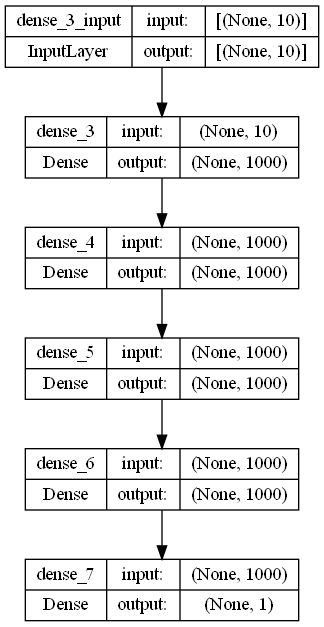

In [11]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

tf.keras.utils.plot_model(model_2, show_shapes=True)

In [12]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              11000     
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 3,015,001
Trainable params: 3,015,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist2 = model_2.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 2s 24ms/step - loss: 0.4764 - accuracy: 0.7769 - val_loss: 0.3787 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 0.3223 - accuracy: 0.8728 - val_loss: 0.3141 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.3088 - accuracy: 0.8679 - val_loss: 0.2966 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2699 - accuracy: 0.8875 - val_loss: 0.2633 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2374 - accuracy: 0.8973 - val_loss: 0.2556 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2310 - accuracy: 0.9022 - val_loss: 0.2554 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.9012 - val_loss: 0.2703 - val_accuracy: 0.8950
Epoch 

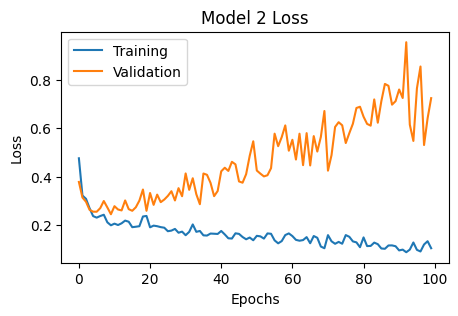

In [14]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist2.history['loss'], label='Training')
plt.plot(hist2.history['val_loss'], label='Validation')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

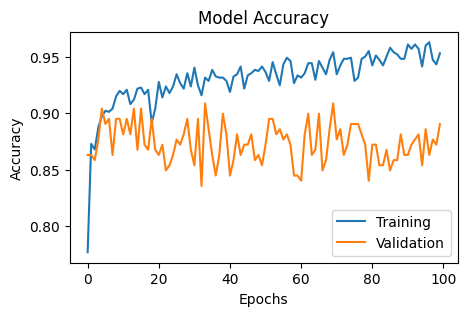

In [15]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist2.history['accuracy'], label='Training')
plt.plot(hist2.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model#3: Dropout

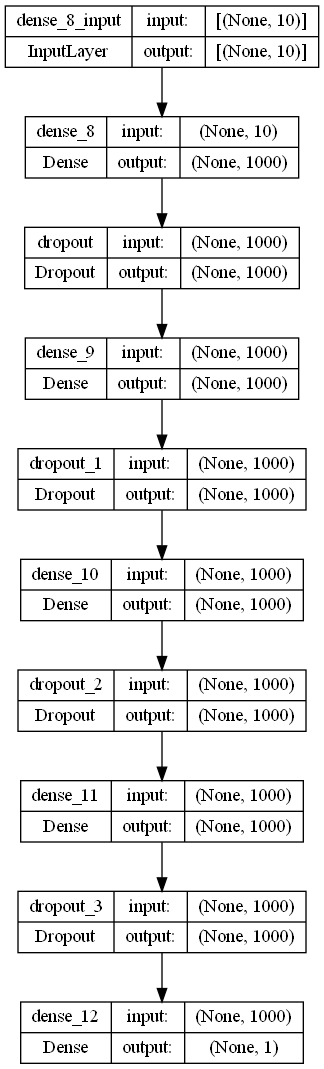

In [16]:
model_3 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])
model_3.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

tf.keras.utils.plot_model(model_3, show_shapes=True)

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              11000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 1000)             

In [18]:
hist3 = model_3.fit(X_train, y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, y_val), verbose=0)

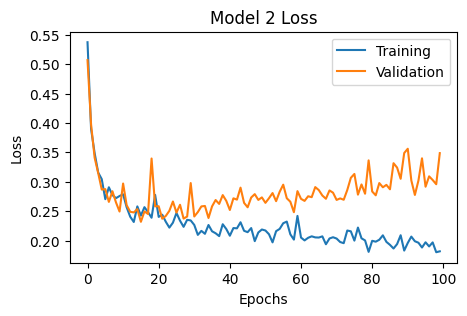

In [19]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(hist3.history['loss'], label='Training')
plt.plot(hist3.history['val_loss'], label='Validation')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

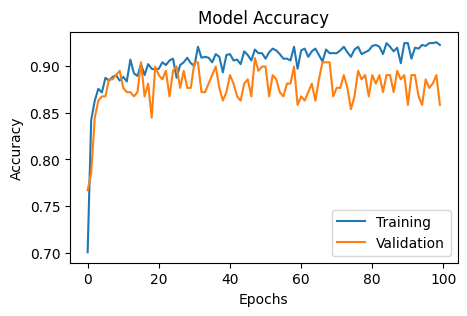

In [20]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(hist3.history['accuracy'], label='Training')
plt.plot(hist3.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()